### Reading the required libraries

In [1]:
library(ggplot2)
library(caret)
library(lmtest)
library(gridExtra)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## **Reading the data**

In [2]:
loan=read.csv("../input/loan-predication//train_u6lujuX_CVtuZ9i (1).csv",header=T)
loan=loan[-1]
summary(loan)

    Gender            Married           Dependents         Education        
 Length:614         Length:614         Length:614         Length:614        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Self_Employed      ApplicantIncome CoapplicantIncome   LoanAmount   
 Length:614         Min.   :  150   Min.   :    0     Min.   :  9.0  
 Class :character   1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 Mode  :character   Median : 3812   Median : 1188     Median :128.0  
                    Mean   : 5403   Mean   : 1621     Mean   :146.4  
                    3rd Qu.: 5795 

The above summary shows that there are few missing values in the data

In [3]:
str(loan)

'data.frame':	614 obs. of  12 variables:
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "No" "Yes" "Yes" "Yes" ...
 $ Dependents       : chr  "0" "1" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Graduate" "Not Graduate" ...
 $ Self_Employed    : chr  "No" "No" "Yes" "No" ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : chr  "Urban" "Rural" "Urban" "Urban" ...
 $ Loan_Status      : chr  "Y" "N" "Y" "Y" ...


## **Checking for missing data**

First, I am converting the missing data that is present as an empty string into NA.

In [4]:
loan[loan==""]=NA

## **Converting the categorical data into factors**

In [5]:
loan$Gender=as.factor(loan$Gender)
loan$Married=as.factor(loan$Married)
loan$Education=as.factor(loan$Education)
loan$Self_Employed=as.factor(loan$Self_Employed)
loan$Property_Area=as.factor(loan$Property_Area)
loan$Loan_Status=as.factor(loan$Loan_Status)
loan[loan=="3+"]="3"
loan$Dependents=as.integer(loan$Dependents)

## **Missing values imputation**

The missing values imputation is done through replacing the missing values present in the data by
* Median in the case of numerical variables
* Mode in the case of categorical variables

In [6]:
loan$Gender[is.na(loan$Gender)]="Male"
loan$Married[is.na(loan$Married)]="Yes"
loan$Dependents[is.na(loan$Dependents)]="0"
loan$Self_Employed[is.na(loan$Self_Employed)]="No"

In [7]:
loan$LoanAmount[is.na(loan$LoanAmount)]=median(loan$LoanAmount, na.rm=TRUE)
loan$Loan_Amount_Term[is.na(loan$Loan_Amount_Term)]=median(loan$Loan_Amount_Term, na.rm=TRUE)
loan$Credit_History[is.na(loan$Credit_History)]=median(loan$Credit_History, na.rm=TRUE)

## **Explanatory Data Analysis**

## **Bivariate Analysis**

Bivariate Analysis for the variables is to be conducted with the dependent variable Loan_Status using percentage stacked barcharts.

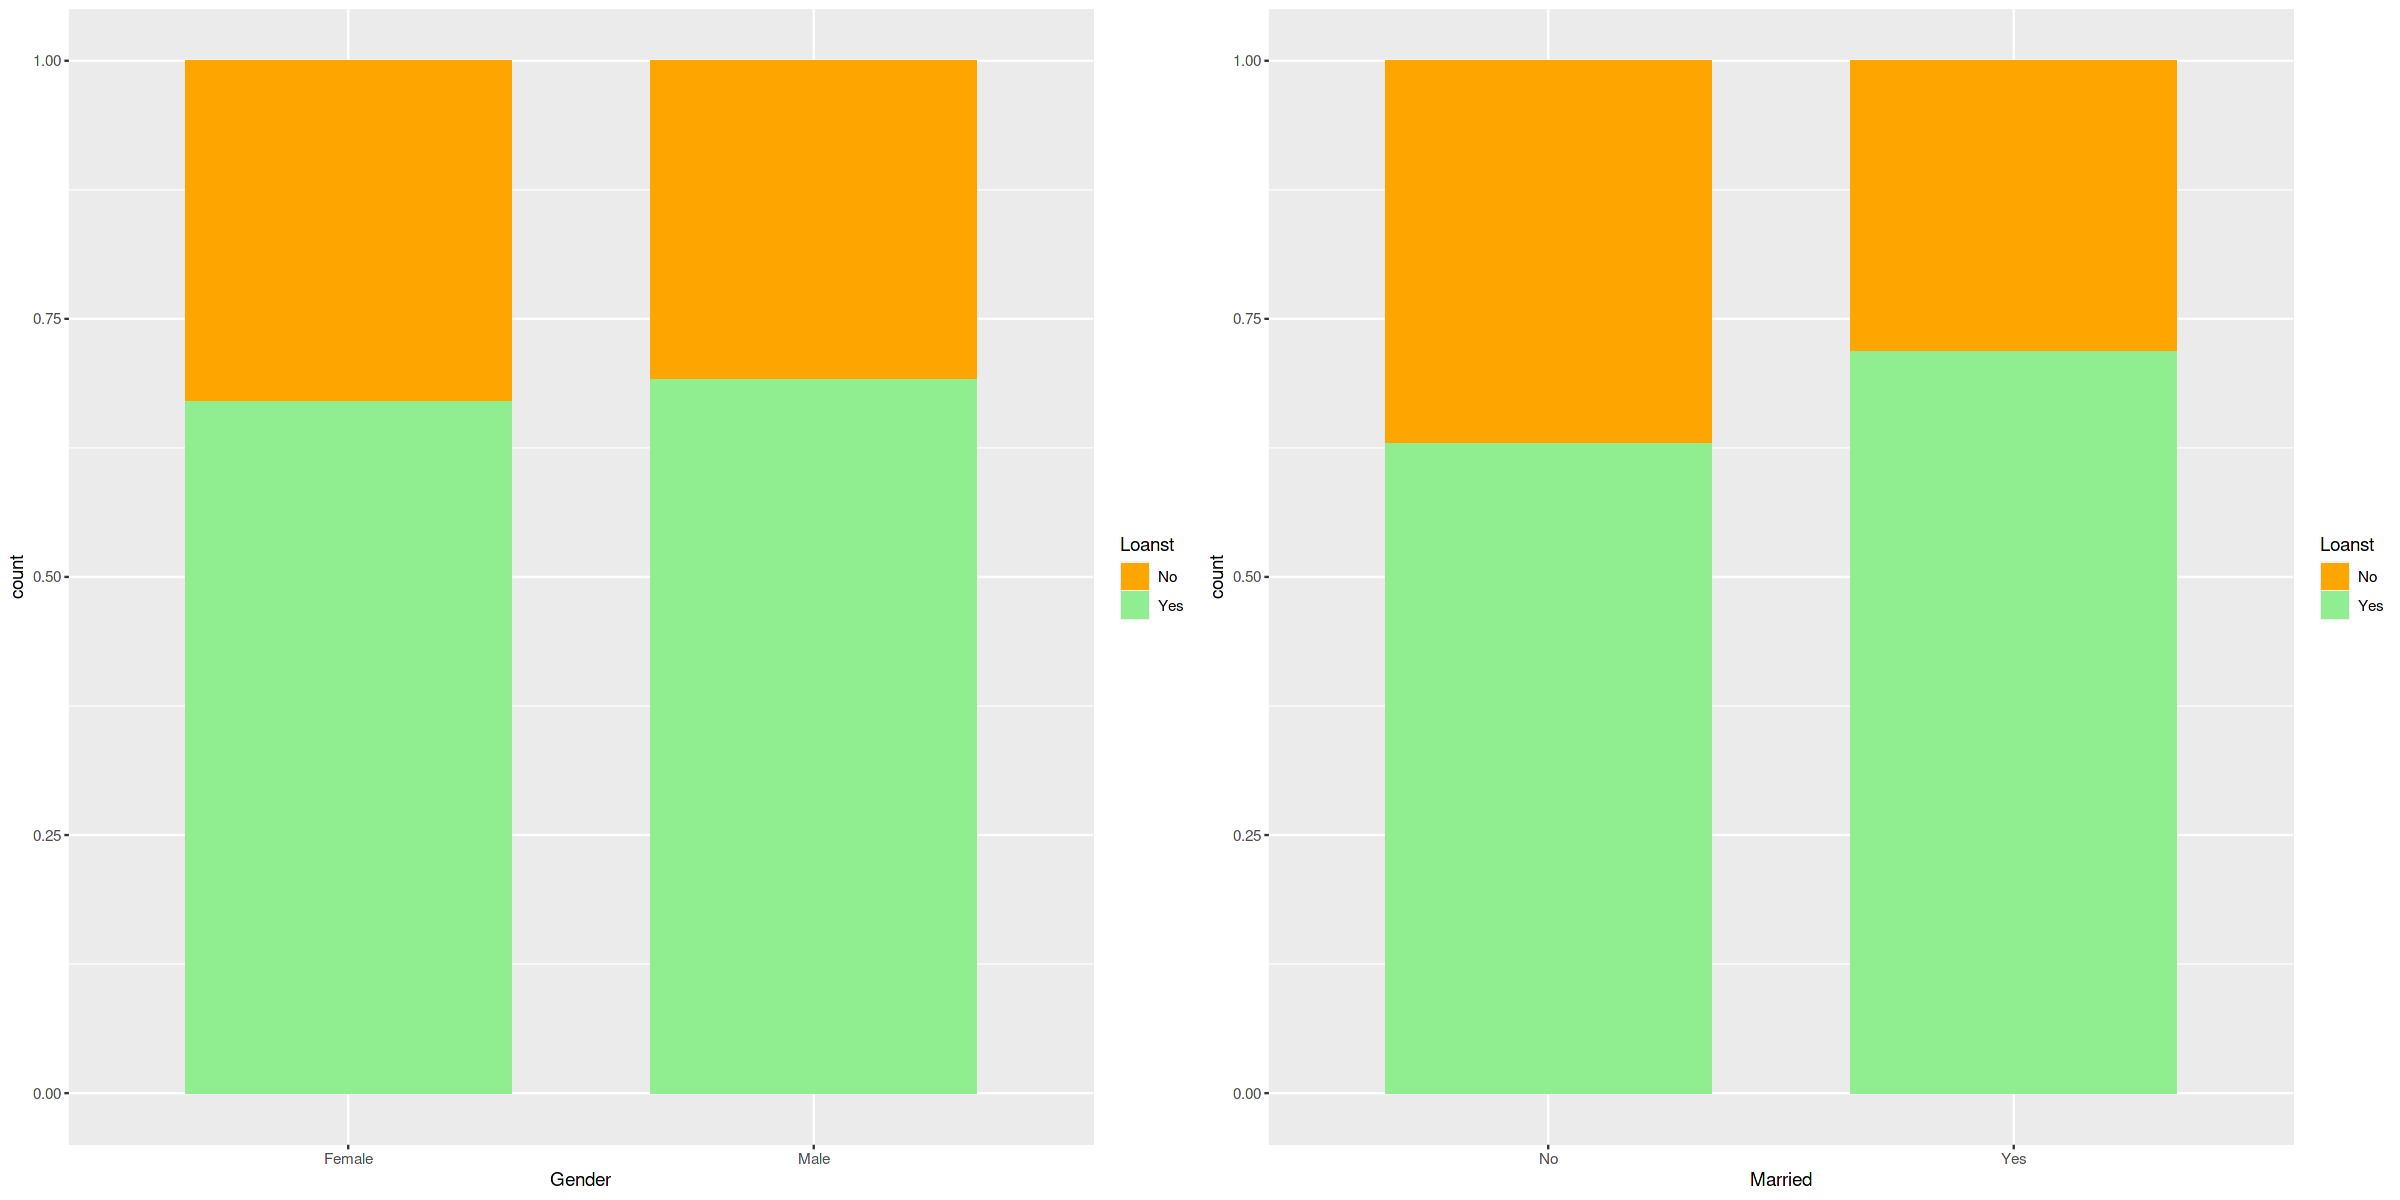

In [8]:
Gender=loan$Gender
Married=loan$Married
Dep=loan$Dependents
Edu=loan$Education
Emp=loan$Self_Employed
Cred=loan$Credit_History
Area=loan$Property_Area
Loanst=loan$Loan_Status

options(repr.plot.width = 20, repr.plot.height =10)
df=data.frame(Gender,Loanst)
plot1=ggplot(df,aes(x=Gender,fill=Loanst))+
  geom_bar(position="fill",width = 0.7)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

df1=data.frame(Married,Loanst)
plot2=ggplot(df1,aes(x=Married,fill=Loanst))+
  geom_bar(position="fill",width = 0.7)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

grid.arrange(plot1,plot2,ncol=2)

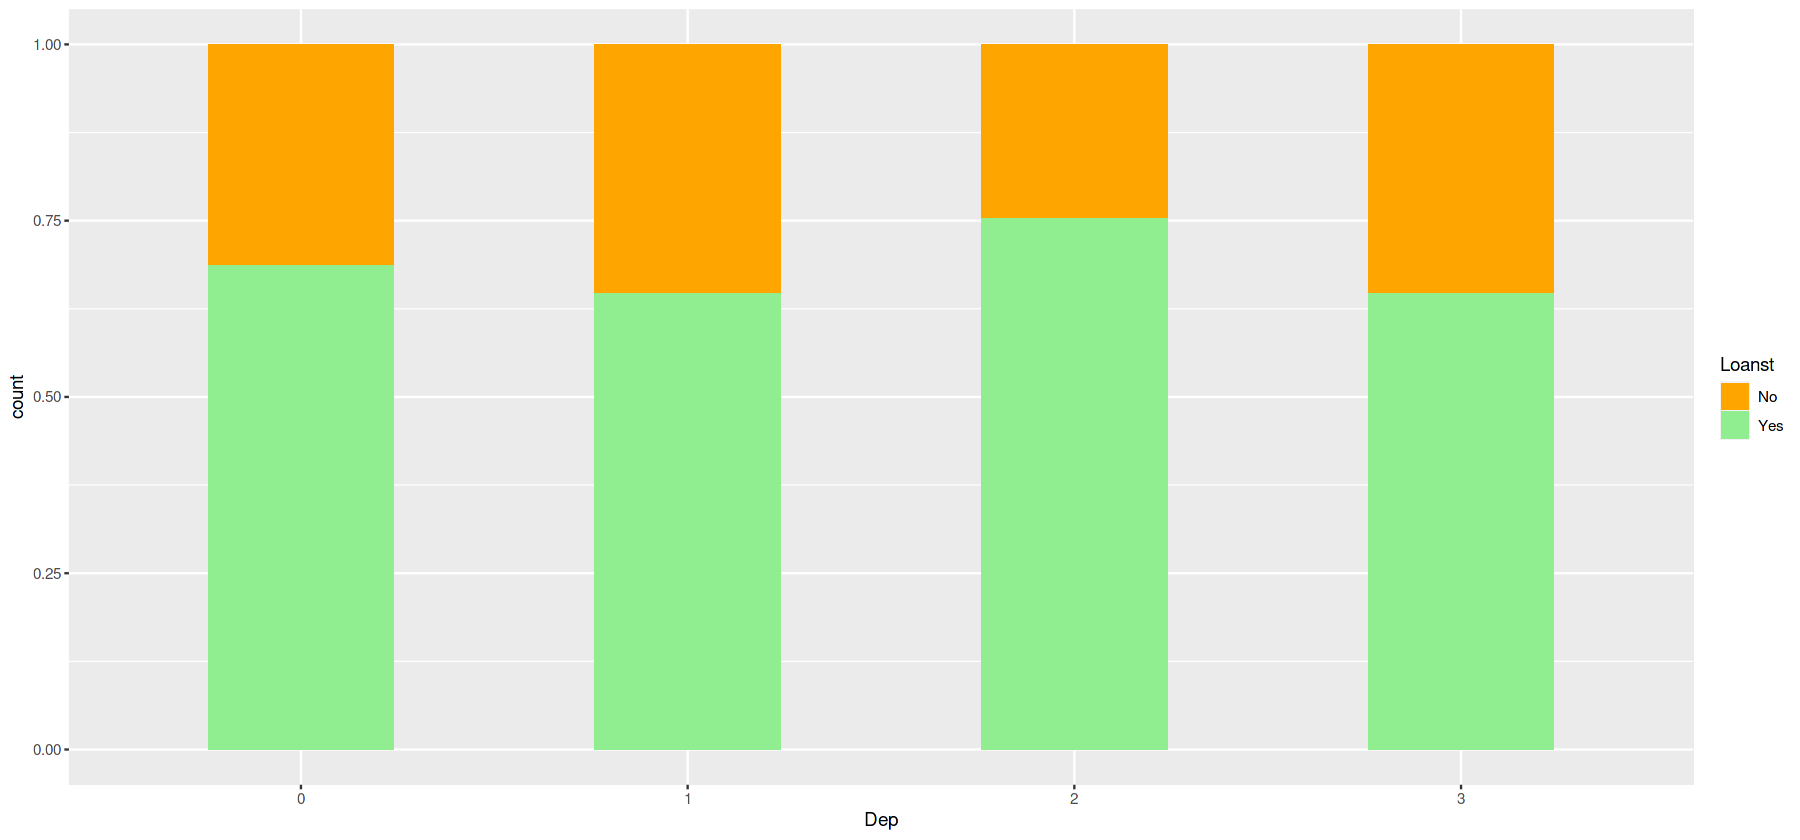

In [9]:
df=data.frame(Dep,Loanst)
options(repr.plot.width = 15, repr.plot.height =7)
ggplot(df,aes(x=Dep,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

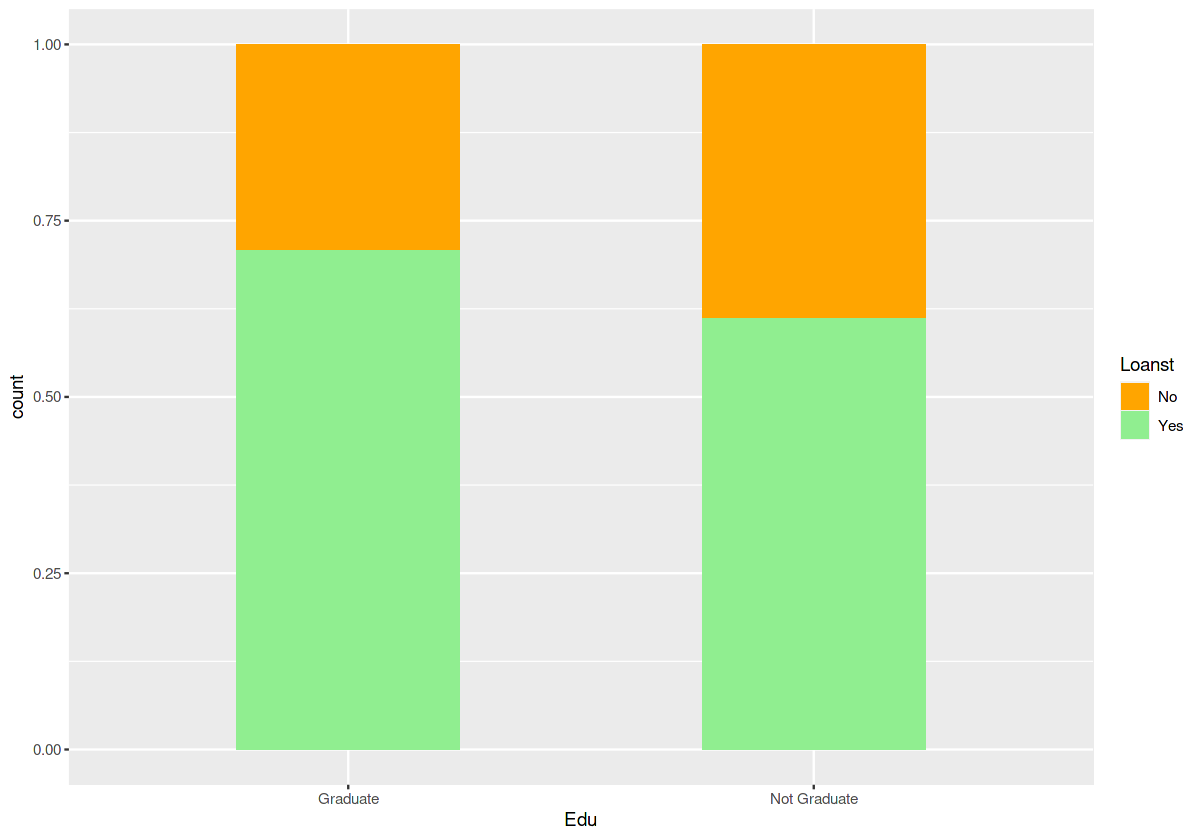

In [10]:
df=data.frame(Edu,Loanst)
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(df,aes(x=Edu,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

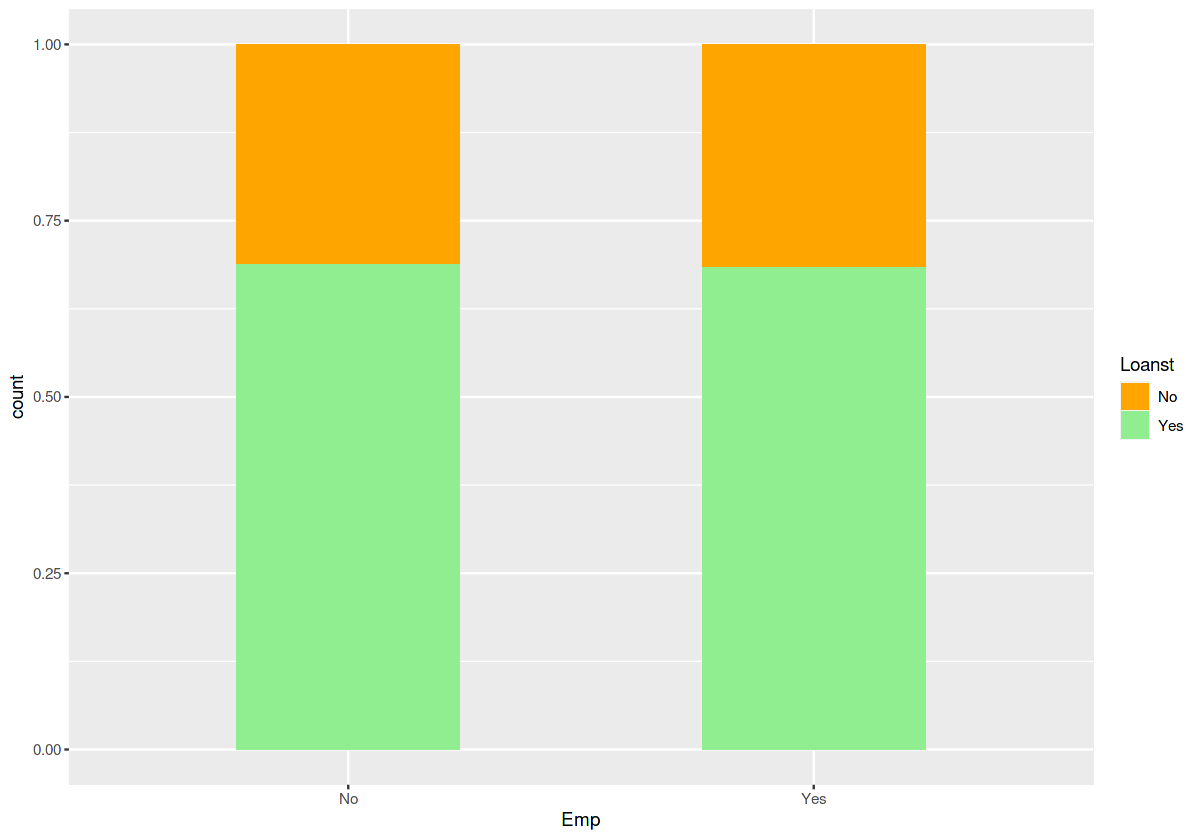

In [11]:
df=data.frame(Emp,Loanst)
ggplot(df,aes(x=Emp,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

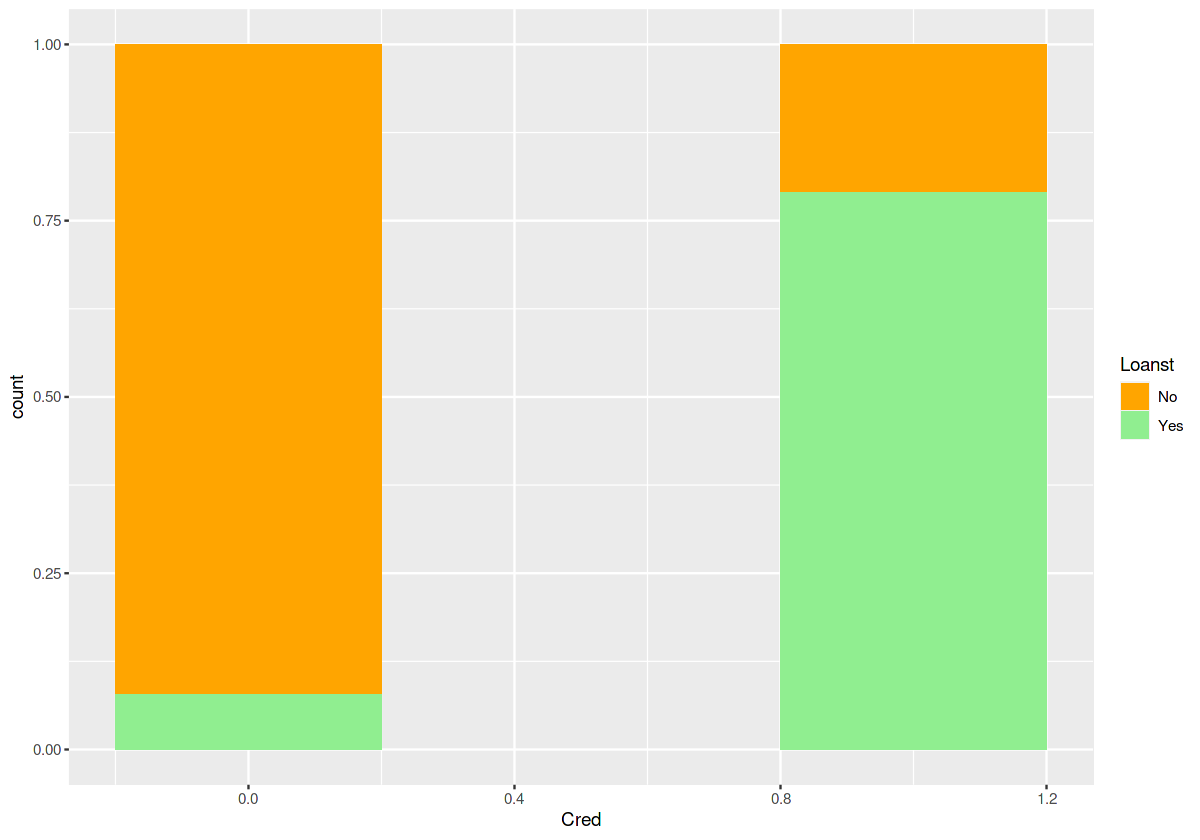

In [12]:
df=data.frame(Cred,Loanst)
ggplot(df,aes(x=Cred,fill=Loanst))+
  geom_bar(position="fill",width = 0.40)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

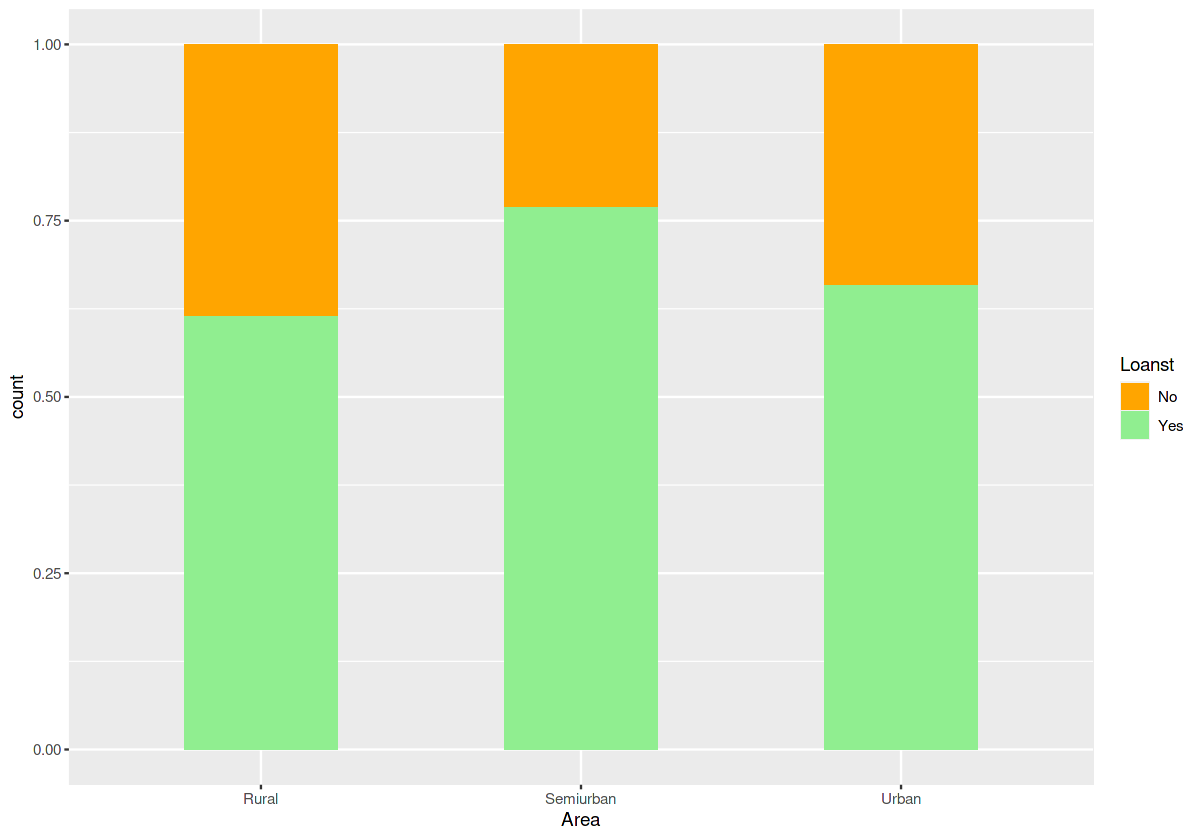

In [13]:
df=data.frame(Area,Loanst)
ggplot(df,aes(x=Area,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

## **Converting factors into numeric**

### Dummy variables are created to include the categorical variables in the model construction.

In [14]:
loan$Gender=ifelse(loan$Gender=="Male",1,0)
loan$Married=ifelse(loan$Married=="Yes",1,0)
loan$Education=ifelse(loan$Education=="Graduate",1,0)
loan$Self_Employed=ifelse(loan$Self_Employed=="Yes",1,0)

## **Normalizing the data**

ApplicantIncome and Co-applicantIncome variables have a large number of outliers and are of similar category. So, a new variable is created, Total_Income as a result of sum of Applicant and Coapplicant Income. Similarly, a new variable EMI is created which is equal to the ratio of Loan Amount and Loan Amount Term.

The old variables ApplicantIncome, Co-applicantIncome, LoanAmount and LoanAmount_Term are removed from the data as they are highly correlated with the new variables.

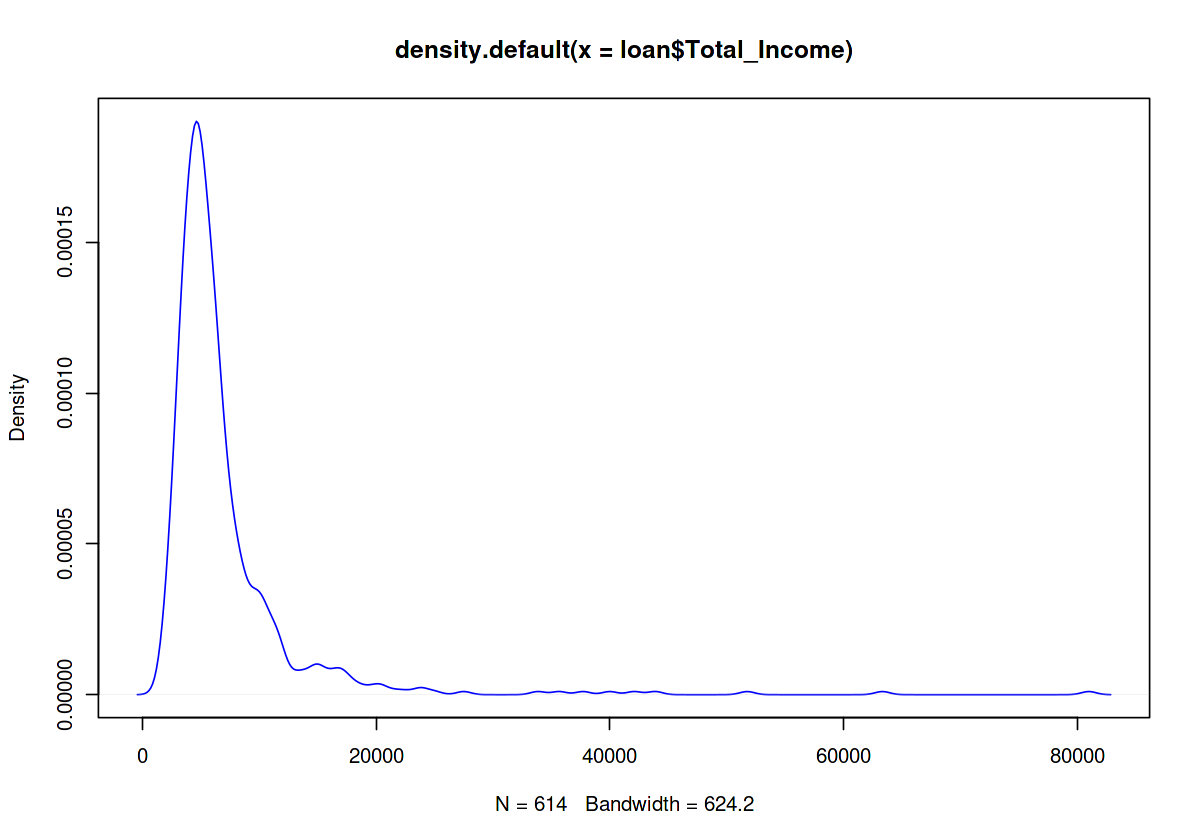

In [15]:
loan$Total_Income=loan$ApplicantIncome+loan$CoapplicantIncome
loan=loan[-7]
loan=loan[-6]
plot(density(loan$Total_Income), col="blue")

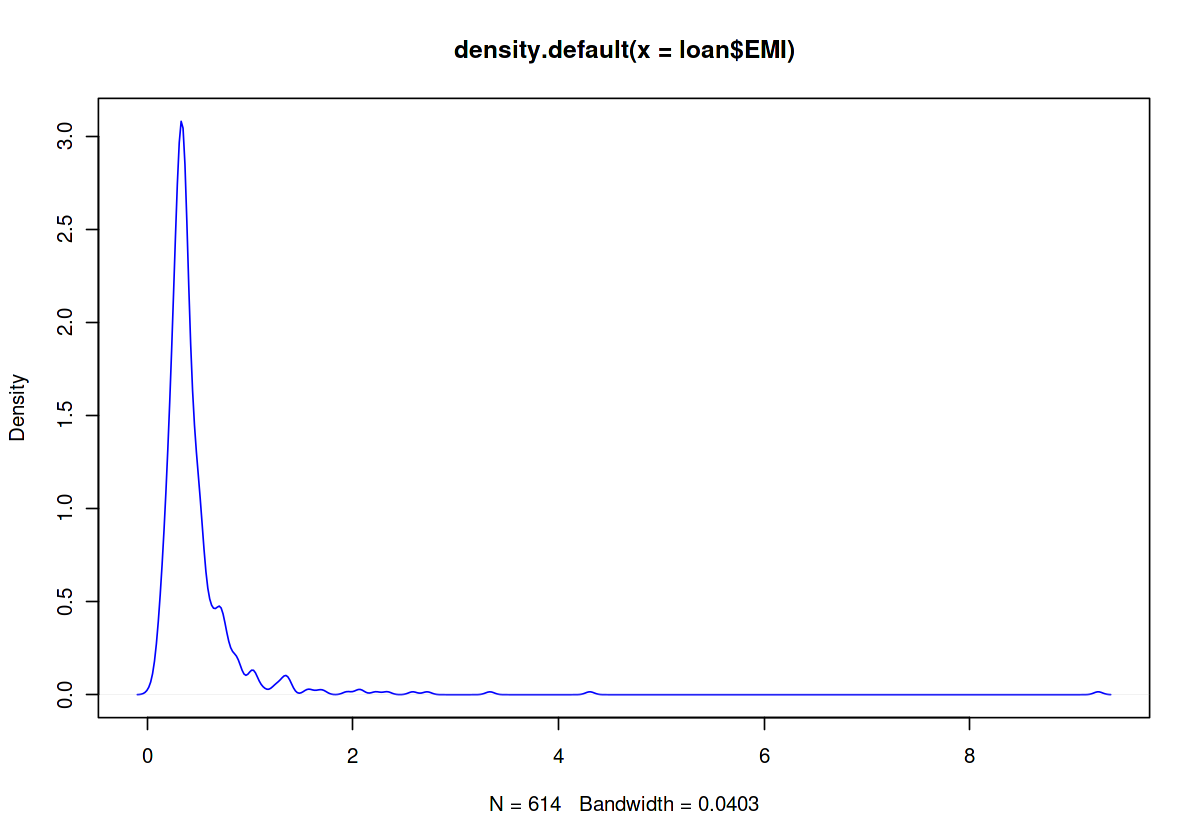

In [16]:
loan$EMI=loan$LoanAmount/loan$Loan_Amount_Term
plot(density(loan$EMI), col="blue")
loan$EMI=log(loan$EMI)
loan=loan[-6]
loan=loan[-6]

The new variables Total_Income and EMI are skewed to the right. So, they are normalized by using logarithmic transformation.

In [17]:
loan$TotalIncome=log(loan$Total_Income)
loan=loan[-9]

So, the final summary of the dataset after all the data processing is as below.

In [18]:
summary(loan)

     Gender          Married        Dependents          Education     
 Min.   :0.0000   Min.   :0.0000   Length:614         Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   Class :character   1st Qu.:1.0000  
 Median :1.0000   Median :1.0000   Mode  :character   Median :1.0000  
 Mean   :0.8176   Mean   :0.6531                      Mean   :0.7818  
 3rd Qu.:1.0000   3rd Qu.:1.0000                      3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000                      Max.   :1.0000  
 Self_Employed    Credit_History    Property_Area Loan_Status      EMI         
 Min.   :0.0000   Min.   :0.000   Rural    :179   N:192       Min.   :-3.6889  
 1st Qu.:0.0000   1st Qu.:1.000   Semiurban:233   Y:422       1st Qu.:-1.2417  
 Median :0.0000   Median :1.000   Urban    :202               Median :-1.0186  
 Mean   :0.1336   Mean   :0.855                               Mean   :-0.9460  
 3rd Qu.:0.0000   3rd Qu.:1.000                               3rd Qu.:-0.6821  
 Max.   :1.0000   Max. 

In [19]:
str(loan)

'data.frame':	614 obs. of  10 variables:
 $ Gender        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Married       : num  0 1 1 1 0 1 1 1 1 1 ...
 $ Dependents    : chr  "0" "1" "0" "0" ...
 $ Education     : num  1 1 1 0 1 1 0 1 1 1 ...
 $ Self_Employed : num  0 0 1 0 0 1 0 0 0 0 ...
 $ Credit_History: num  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status   : Factor w/ 2 levels "N","Y": 2 1 2 2 2 2 2 1 2 1 ...
 $ EMI           : num  -1.034 -1.034 -1.696 -1.099 -0.937 ...
 $ TotalIncome   : num  8.67 8.71 8.01 8.51 8.7 ...
